In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#Analyzing Violent crimes in cincinnati and 

In [3]:
#Let us analyze the household income level of cincinnati from 2013 to 2019.
#Because poverty is one of the reasons for crimes

In [4]:
income = pd.read_csv('D:\python\Python_project\Datasets\Income by location.csv')

In [5]:
#Data had values only till the eyar 2017 , did forecasting to add values for 2018 and 2019

In [6]:
income

ID Year  Year  ID Race   Race  Household Income by Race  \
0       2013  2013        0  Total                 36412.000   
1       2013  2013        0  Total                 18852.000   
2       2013  2013        0  Total                 12799.000   
3       2013  2013        0  Total                 20164.000   
4       2013  2013        0  Total                 23157.000   
..       ...   ...      ...    ...                       ...   
834     2019  2019        0  Total                 20653.548   
835     2019  2019        0  Total                 33369.522   
836     2019  2019        0  Total                 29865.000   
837     2019  2019        0  Total                 39639.000   
838     2019  2019        0  Total                 31706.856   

     Household Income by Race Moe                              Geography  \
0                        5673.000  Census Tract 108, Hamilton County, OH   
1                        4267.000   Census Tract 94, Hamilton County, OH   
2                        2927.000   Census Tract 36, Hamilton County, OH   
3                        5162.000   Census Tract 77, Hamilton County, OH   
4                        5524.000   Census Tract 29, Hamilton County, OH   
..                            ...                                    ...   
834                      6322.692   Census Tract 71, Hamilton County, OH   
835                      8701.032   Census Tract 75, Hamilton County, OH   
836                      9047.466   Census Tract 72, Hamilton County, OH   
837                     21133.560   Census Tract 74, Hamilton County, OH   
838                      8748.816   Census Tract 73, Hamilton County, OH   

           ID Geography  
0    14000US39061010800  
1    14000US39061009400  
2    14000US39061003600  
3    14000US39061007700  
4    14000US39061002900  
..                  ...  
834  14000US39061007100  
835  14000US39061007500  
836  14000US39061007200  
837  14000US39061007400  
838  14000US39061007300  

[839 rows x 8 columns]

In [7]:
income_by_year = income.groupby('Year',as_index=False).agg({'Household Income by Race Moe':['mean','median']})

In [8]:
income_by_year.columns = ['Year','Mean household income','Median household income']

In [9]:
income_by_year

Year  Mean household income  Median household income
0  2013            8644.350000                 7225.000
1  2014            8300.466667                 6775.500
2  2015            7836.425000                 7028.000
3  2016            8713.386555                 6689.000
4  2017            9341.733333                 7202.500
5  2018            8964.190950                 7492.325
6  2019            9387.764100                 7846.350

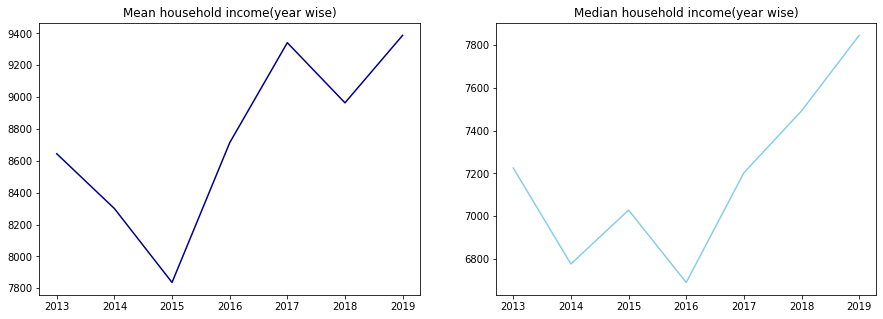

In [10]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Mean household income(year wise)')
plt.plot('Year','Mean household income',data=income_by_year,color='darkblue')
plt.subplot(1,2,2)
plt.title('Median household income(year wise)')
plt.plot('Year','Median household income',data=income_by_year,color='skyblue')
plt.show()

Now Let us analyze the crime dataset and use that for modelling

In [11]:
crimes = pd.read_csv('D:\python\Python_project\Datasets\Crime.csv')

C:\Users\kisho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
crimes.columns

Index(['INSTANCEID', 'INCIDENT_NO', 'DATE_REPORTED', 'DATE_FROM', 'DATE_TO',
       'CLSD', 'UCR', 'DST', 'BEAT', 'OFFENSE', 'LOCATION', 'THEFT_CODE',
       'FLOOR', 'SIDE', 'OPENING', 'HATE_BIAS', 'DAYOFWEEK', 'RPT_AREA',
       'CPD_NEIGHBORHOOD', 'SNA_NEIGHBORHOOD', 'WEAPONS', 'DATE_OF_CLEARANCE',
       'HOUR_FROM', 'HOUR_TO', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X',
       'VICTIM_AGE', 'VICTIM_RACE', 'VICTIM_ETHNICITY', 'VICTIM_GENDER',
       'SUSPECT_AGE', 'SUSPECT_RACE', 'SUSPECT_ETHNICITY', 'SUSPECT_GENDER',
       'TOTALNUMBERVICTIMS', 'TOTALSUSPECTS', 'UCR_GROUP',
       'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'ZIP'],
      dtype='object')

In [13]:
#Let us drop the columns right now that we might not use for modelling

In [14]:
crimes=crimes.drop(['INSTANCEID','COMMUNITY_COUNCIL_NEIGHBORHOOD','FLOOR','SIDE','OPENING','CLSD', 'UCR', 'DST', 'BEAT','RPT_AREA','UCR_GROUP','THEFT_CODE','HATE_BIAS','VICTIM_ETHNICITY','SUSPECT_ETHNICITY'],axis=1)

In [15]:
crimes = crimes.dropna().reset_index(drop=True)

In [16]:
crimes

INCIDENT_NO           DATE_REPORTED               DATE_FROM  \
0        129036747  12/18/2012 10:30:00 PM  12/18/2012 10:24:00 PM   
1        149026722  10/20/2014 11:09:00 AM  10/19/2014 10:00:00 PM   
2        179011319  04/03/2017 08:50:00 PM  04/03/2017 05:00:00 PM   
3        139026892  09/29/2013 10:46:00 PM  09/29/2013 08:00:00 PM   
4        139014514  06/07/2013 08:33:00 PM  06/07/2013 08:20:00 PM   
...            ...                     ...                     ...   
147093   149028275  11/04/2014 06:10:00 PM  11/04/2014 05:40:00 PM   
147094   189017619  06/30/2018 08:55:00 PM  06/30/2018 07:55:00 PM   
147095    31110066  11/17/2011 08:51:00 PM  11/17/2011 08:40:00 PM   
147096    11002934  07/11/2010 03:00:00 PM  07/09/2010 10:30:00 PM   
147097   159026963  09/30/2015 02:18:00 PM  09/30/2015 01:00:00 PM   

                       DATE_TO                        OFFENSE  \
0       12/18/2012 10:25:00 PM             AGGRAVATED ROBBERY   
1       10/20/2014 10:30:00 AM                          THEFT   
2       04/03/2017 05:10:00 PM             AGGRAVATED ROBBERY   
3       09/29/2013 09:00:00 PM           MENACING BY STALKING   
4       06/07/2013 08:30:00 PM                        ASSAULT   
...                        ...                            ...   
147093  11/04/2014 05:40:00 PM             AGGRAVATED ROBBERY   
147094  06/30/2018 08:15:00 PM                        ASSAULT   
147095  11/17/2011 08:48:00 PM  CRIMINAL DAMAGING/ENDANGERING   
147096  07/09/2010 10:40:00 PM            AGGRAVATED MENACING   
147097  09/30/2015 01:20:00 PM                        ASSAULT   

                       LOCATION  DAYOFWEEK CPD_NEIGHBORHOOD SNA_NEIGHBORHOOD  \
0                     47-STREET    TUESDAY     WALNUT HILLS     WALNUT HILLS   
1                48-PARKING LOT     SUNDAY     WALNUT HILLS     WALNUT HILLS   
2                48-PARKING LOT     MONDAY       MOUNT AIRY         MT. AIRY   
3         01-SINGLE FAMILY HOME     SUNDAY    COLLEGE  HILL     COLLEGE HILL   
4                     47-STREET     FRIDAY         EVANSTON         EVANSTON   
...                         ...        ...              ...              ...   
147093                47-STREET    TUESDAY   OVER-THE-RHINE   OVER-THE-RHINE   
147094              11-HOSPITAL   SATURDAY       CORRYVILLE       CORRYVILLE   
147095                47-STREET   THURSDAY  WEST PRICE HILL  WEST PRICE HILL   
147096          02-MULTI FAMILY     FRIDAY   OVER-THE-RHINE   OVER-THE-RHINE   
147097  03-RESIDENTIAL FACILITY  WEDNESDAY     WALNUT HILLS     WALNUT HILLS   

                                                 WEAPONS  ... LATITUDE_X  \
0                                           12 - HANDGUN  ...  39.126512   
1                                              99 - NONE  ...  39.129501   
2                                           12 - HANDGUN  ...  39.192750   
3       40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...  39.207029   
4                                              99 - NONE  ...  39.140473   
...                                                  ...  ...        ...   
147093                                      12 - HANDGUN  ...  39.111243   
147094  40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...  39.136645   
147095                     11--FIREARM (TYPE NOT STATED)  ...  39.115022   
147096   40--PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...  39.112050   
147097  40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)  ...  39.127156   

        VICTIM_AGE  VICTIM_RACE VICTIM_GENDER  SUSPECT_AGE  SUSPECT_RACE  \
0            41-50        BLACK          MALE      UNKNOWN         BLACK   
1            31-40        BLACK        FEMALE        31-40         WHITE   
2         UNDER 18        BLACK          MALE     UNDER 18         BLACK   
3            31-40        BLACK          MALE        26-30         BLACK   
4            26-30        BLACK        FEMALE        18-25         BLACK   
...            ...          ...           ...          

In [17]:
# We have categorize the offenses as violent, property and other crimes, 
#so let us take a look at the number of unique offense list

In [18]:
crimes.OFFENSE.unique()

array(['AGGRAVATED ROBBERY', 'THEFT', 'MENACING BY STALKING', 'ASSAULT',
       'TELEPHONE HARASSMENT', 'AGGRAVATED MENACING', 'ROBBERY',
       'FELONIOUS ASSAULT', 'DOMESTIC VIOLENCE', 'AGGRAVATED BURGLARY',
       'CRIMINAL DAMAGING/ENDANGERING', 'MENACING',
       'BREAKING AND ENTERING', 'ABDUCTION',
       'VIOLATE PROTECTION ORDER/CONSENT AGREEMENT', 'PASSING BAD CHECKS',
       'AGGRAVATED ASSAULT', 'BURGLARY', 'GROSS SEXUAL IMPOSITION',
       'ENDANGERING CHILDREN', 'UNAUTHORIZED USE OF MOTOR VEHICLE',
       'UNLAWFUL RESTRAINT', 'SEXUAL IMPOSITION', 'AGGRAVATED MURDER',
       'MISUSE OF CREDIT CARD', 'TAKING THE IDENTITY OF ANOTHER',
       'FELONIOUS ASSAULT - VICTIM SERIOUSLY HARMED',
       'UNLAWFUL SEXUAL CONDUCT WITH A MINOR', 'FORGERY', 'MURDER',
       'THEFT- WITHOUT CONSENT     M1F4',
       'IMPROPERLY DISCHARGING FIREARM AT/INTO HABITATION/SCHOOL',
       'TELECOMMUNICATIONS FRAUD', 'VANDALISM', 'KIDNAPPING',
       'AGGRAVATED VEHICULAR ASSAULT', 'SEXUAL BATTE

In [19]:
#before we start analyzing let us convert the columns to lower case for ease of use , 
#we can also perform the same operation by using apply and lambda

In [20]:
def lowercase(col):
    return col.lower()

In [21]:
crimes.columns =  [lowercase(x) for x in crimes.columns]

In [22]:
#Let us classify the crimes as violent by creating a function for the same and assingning it to a new column

In [23]:
def violent(offense):
    violent_crimes_list = ['homicide','rape','robbery','arson','manslaughter','aggravated assault']
    if any(s in offense.lower() for s in violent_crimes_list):
        vio = 1
    else:
        vio = 0
    return vio

In [24]:
crimes['isviolent'] = [violent(off) for off in crimes.offense]

In [25]:
violnt_crims_cnt = len(crimes[crimes.isviolent==1])
noviolnt_crims_cnt = len(crimes[crimes.isviolent==0])

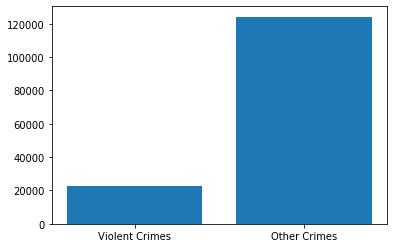

In [26]:
count = [violnt_crims_cnt,noviolnt_crims_cnt]
plt.bar([0,1],count)
plt.xticks([0,1],['Violent Crimes','Other Crimes'])
plt.show()

In [27]:
print((violnt_crims_cnt/len(crimes.isviolent))*100)

15.518905763504604


In [28]:
# we can see that violent crimes are 15% of the all the crimes 

In [29]:
year_crime = pd.DatetimeIndex((crimes[crimes.isviolent==1]).date_reported).year

In [30]:
yrwise_crime= pd.DataFrame(data=year_crime.values)

In [31]:
yrwise_crime.columns = ['year']

In [32]:
vlnt_crime_yearwise = yrwise_crime['year'].value_counts()

In [33]:
vlnt_crime_yearwise = vlnt_crime_yearwise.sort_index(ascending=True)

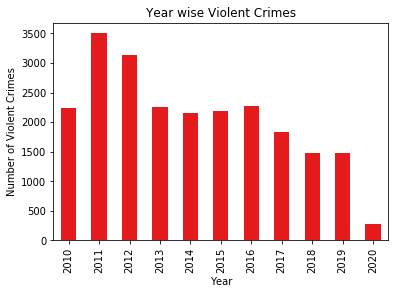

In [34]:
bar_chart = vlnt_crime_yearwise.plot(kind='bar',colormap='Set1')
bar_chart.set_ylabel('Number of Violent Crimes')
bar_chart.set_xlabel('Year')
bar_chart.set_title('Year wise Violent Crimes')
plt.show()

In [35]:
#In the previous chart ,we can see the year wise split of violen crimes , now let us analyze more

In [36]:
#let us try to find the most affected and least affect nighborhoods of cincinnati and visualize them

In [37]:
cpd_crime = crimes[crimes.isviolent==1].cpd_neighborhood

In [38]:
neighwise_crime = pd.DataFrame(data=cpd_crime.values)

In [39]:
neighwise_crime.columns = ['cpd_neighborhood']
vlnt_crime_neighwise = neighwise_crime['cpd_neighborhood'].value_counts()
vlnt_crime_neighwise = vlnt_crime_neighwise.sort_index(ascending =True)

In [40]:
vlnt_crime_neighwise.sort_values(ascending=False).head(10)

WESTWOOD           1976
OVER-THE-RHINE     1841
EAST PRICE HILL    1644
WEST PRICE HILL    1514
AVONDALE           1331
WALNUT HILLS       1159
FAIRVIEW            944
NORTHSIDE           793
COLLEGE  HILL       741
WEST  END           724
Name: cpd_neighborhood, dtype: int64

In [41]:
vlnt_crimes_cpd_top10 = vlnt_crime_neighwise.sort_values(ascending=False).head(10)
vlnt_crimes_cpd_low10 = vlnt_crime_neighwise.sort_values(ascending=False).tail(10)
vlnt_crimes_cpd_low10

HYDE PARK              60
MOUNT  ADAMS           52
EAST  END              51
SAYLER  PARK           47
COLUMBIA / TUSCULUM    36
MT.  LOOKOUT           29
RIVERSIDE              26
O'BRYONVILLE           19
LINWOOD                 8
CALIFORNIA              2
Name: cpd_neighborhood, dtype: int64

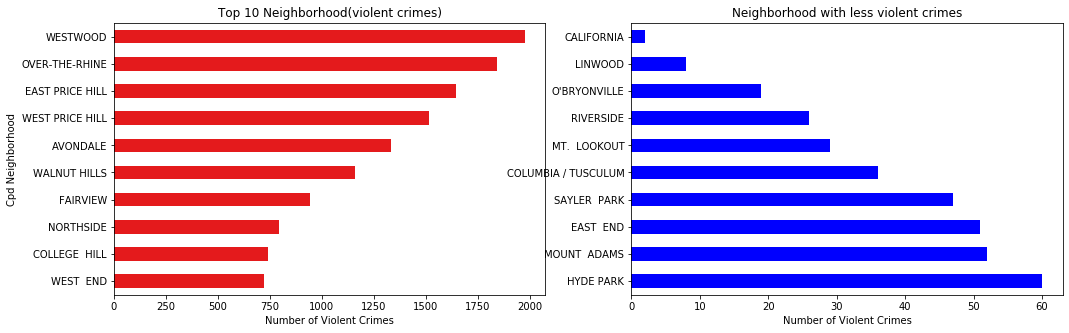

In [42]:
plt.figure(figsize=[17,5])
plt.subplot(1,2,1)
bar_chart = vlnt_crimes_cpd_top10.sort_values(ascending = True).plot(kind='barh',colormap='Set1')
bar_chart.set_ylabel('Cpd Neighborhood')
bar_chart.set_xlabel('Number of Violent Crimes')
bar_chart.set_title('Top 10 Neighborhood(violent crimes)')
plt.subplot(1,2,2)
bar_chart = vlnt_crimes_cpd_low10.plot(kind='barh',colormap='winter')
bar_chart.set_xlabel('Number of Violent Crimes')
bar_chart.set_title('Neighborhood with less violent crimes')
plt.show()

In [43]:
# As we can see the the top 10 most affected and least affected neighborhoods with violent crimes

In [44]:
#Now let us get to know the split of crimes in the most affected locaities

In [45]:
def prperty(offense):
    property_crimes_list = ['burglary','theft']
    if any(s in offense.lower() for s in property_crimes_list):
        pro = 1
    else:
        pro = 0
    return pro

In [46]:
crimes['ispropcrime'] = [prperty(off) for off in crimes.offense]
crimes['isothercrime'] = np.where((crimes.isviolent == 0) & (crimes.ispropcrime == 0) ,1,0)

In [47]:
crimes_cpd_stats = crimes.groupby('cpd_neighborhood')['isviolent','ispropcrime','isothercrime'].apply(lambda x : x.sum())

In [48]:
crime_tp10 = vlnt_crime_neighwise.sort_values(ascending=False).head(10)

In [49]:
crime_tp10.columns = ['cpd_neighborhood','total_crimes']

In [50]:
crimes_cpd_stats = pd.DataFrame(data=crimes_cpd_stats).reset_index()

In [51]:
crime_tp10 = pd.DataFrame(data=crime_tp10).reset_index()

In [52]:
crime_tp10.columns = ['cpd_neighborhood','crimes_count']

In [53]:
crimes_cpd_stats = pd.merge(crimes_cpd_stats,crime_tp10)

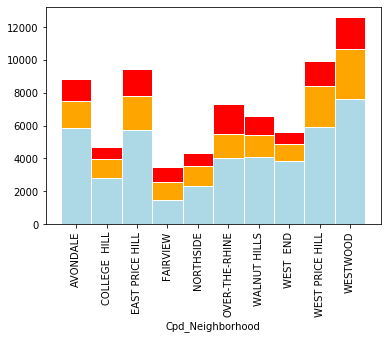

In [54]:
bars = np.add(crimes_cpd_stats.isothercrime, crimes_cpd_stats.ispropcrime).tolist()
r = [0,1,2,3,4,5,6,7,8,9]
plt.bar(r, crimes_cpd_stats.isothercrime, color='#ADD8E6', edgecolor='white', width=1)
plt.bar(r,crimes_cpd_stats.ispropcrime,bottom=crimes_cpd_stats.isothercrime, color='#FFA500', edgecolor='white', width=1)
plt.bar(r, crimes_cpd_stats.isviolent,bottom=bars, color='#FF0000', edgecolor='white', width=1)
plt.xticks(r, crimes_cpd_stats.cpd_neighborhood,rotation =90)
plt.xlabel("Cpd_Neighborhood")
plt.show()

In [55]:
#We can Clearly see the split of crimes for the neighborhood

In [56]:
#Now let us try modelling by using certain features and target variable

In [57]:
crimes.date_to = pd.to_datetime(crimes.date_to,errors='coerce')

In [58]:
#After performing conversion it is better to drop null values and clean the data

In [59]:
crimes.shape

(147098, 28)

In [60]:
crimes = crimes.dropna()

In [61]:
crimes.shape

(147097, 28)

In [62]:
crimes = crimes[crimes.date_to > datetime.strptime('2019 03 01','%Y %m %d')].reset_index()

In [63]:
#Dropping columns which are not necessary for the modelling

In [64]:
crimes = crimes.drop(['index', 'incident_no','sna_neighborhood', 'weapons', 'date_of_clearance', 'hour_from',
       'hour_to', 'address_x','victim_age',
       'victim_race', 'victim_gender', 'suspect_age', 'suspect_race',
       'suspect_gender', 'totalnumbervictims', 'totalsuspects','location'],axis = 1)

In [65]:
#Creating a new column date which will help us merge with the weather data

In [66]:
crimes['date'] = crimes['date_to'].dt.date

In [67]:
crimes.head()

date_reported               date_from             date_to  \
0  03/18/2020 02:43:00 AM  03/18/2020 02:30:00 AM 2020-03-18 02:42:00   
1  03/03/2019 08:14:00 PM  03/03/2019 03:00:00 PM 2019-03-03 20:00:00   
2  11/04/2019 04:06:00 PM  11/04/2019 11:00:00 AM 2019-11-04 12:00:00   
3  10/02/2019 03:35:00 PM  10/02/2019 03:15:00 PM 2019-10-02 15:21:00   
4  03/04/2020 08:35:00 AM  03/04/2020 08:15:00 AM 2020-03-04 08:30:00   

                offense  dayofweek  cpd_neighborhood  longitude_x  latitude_x  \
0                 THEFT  WEDNESDAY  SOUTH  FAIRMOUNT   -84.556801   39.120243   
1                 THEFT     SUNDAY   WEST PRICE HILL   -84.599549   39.123823   
2                 THEFT     MONDAY      MADISONVILLE   -84.386171   39.161537   
3                 THEFT  WEDNESDAY   WEST PRICE HILL   -84.603468   39.123142   
4  TELEPHONE HARASSMENT  WEDNESDAY          FAIRVIEW   -84.520542   39.122972   

       zip  isviolent  ispropcrime  isothercrime        date  
0  45214.0          0            1             0  2020-03-18  
1  45238.0          0            1             0  2019-03-03  
2  45227.0          0            1             0  2019-11-04  
3  45238.0          0            1             0  2019-10-02  
4  45219.0          0            0             1  2020-03-04

In [68]:
#Importing weather data to help in the model

In [69]:
weather = pd.read_csv('D:\python\Python_project\Datasets\weather_cinci.csv')

In [70]:
weather['date'] = weather['date'].apply( lambda d : datetime.strptime(d,'%Y-%m-%d'))

In [71]:
weather['date'] = weather['date'].dt.date

In [72]:
crimes = pd.merge(crimes,weather,left_on='date',right_on='date')

In [73]:
crimes.head()

date_reported               date_from             date_to  \
0  03/18/2020 02:43:00 AM  03/18/2020 02:30:00 AM 2020-03-18 02:42:00   
1  03/18/2020 07:15:00 PM  03/18/2020 06:30:00 PM 2020-03-18 19:00:00   
2  03/18/2020 12:56:00 AM  03/18/2020 12:20:00 AM 2020-03-18 00:30:00   
3  03/18/2020 06:53:00 PM  03/18/2020 06:50:00 PM 2020-03-18 18:52:00   
4  03/18/2020 02:22:00 PM  03/18/2020 02:15:00 PM 2020-03-18 14:22:00   

                                      offense  dayofweek  cpd_neighborhood  \
0                                       THEFT  WEDNESDAY  SOUTH  FAIRMOUNT   
1  VIOLATE PROTECTION ORDER/CONSENT AGREEMENT  WEDNESDAY         WEST  END   
2                           FELONIOUS ASSAULT  WEDNESDAY      WALNUT HILLS   
3                                     ASSAULT  WEDNESDAY      SAYLER  PARK   
4                                       THEFT  WEDNESDAY        CORRYVILLE   

   longitude_x  latitude_x      zip  isviolent  ispropcrime  isothercrime  \
0   -84.556801   39.120243  45214.0          0            1             0   
1   -84.529862   39.107598  45203.0          0            0             1   
2   -84.490842   39.123605  45206.0          0            0             1   
3   -84.690670   39.110767  45233.0          0            0             1   
4   -84.507753   39.128826  45219.0          0            1             0   

         date  temperature  humidity  wind_speed  precipitation  
0  2020-03-18         48.8      94.7         4.9            0.0  
1  2020-03-18         48.8      94.7         4.9            0.0  
2  2020-03-18         48.8      94.7         4.9            0.0  
3  2020-03-18         48.8      94.7         4.9            0.0  
4  2020-03-18         48.8      94.7         4.9            0.0

In [74]:
crime_stats = crimes.groupby('cpd_neighborhood')['isviolent','ispropcrime','isothercrime'].apply(lambda x : x.sum()).reset_index()

In [75]:
crime_stats.columns = ['cpd_neighborhood','sumviolent','sumpropcrime','sumothercrime']

In [76]:
X = pd.merge(crimes,crime_stats,on='cpd_neighborhood')

In [77]:
#Checking for correlation between features

In [78]:
X.corr()

longitude_x  latitude_x       zip  isviolent  ispropcrime  \
longitude_x       1.000000    0.231726  0.020024  -0.016400    -0.003021   
latitude_x        0.231726    1.000000  0.081150  -0.029454    -0.015787   
zip               0.020024    0.081150  1.000000  -0.001948     0.003703   
isviolent        -0.016400   -0.029454 -0.001948   1.000000    -0.191269   
ispropcrime      -0.003021   -0.015787  0.003703  -0.191269     1.000000   
isothercrime      0.013167    0.032999 -0.002102  -0.464004    -0.780729   
temperature       0.033596    0.009183 -0.001192   0.001895    -0.015918   
humidity         -0.001525    0.002386  0.010307  -0.009638     0.013883   
wind_speed        0.007774    0.004808 -0.024150  -0.012290    -0.009748   
precipitation    -0.002741   -0.007660  0.002437  -0.013860     0.003656   
sumviolent       -0.508188   -0.324266 -0.042464   0.062165    -0.019058   
sumpropcrime     -0.573059   -0.180187 -0.018758   0.021964     0.015581   
sumothercrime    -0.540291   -0.150081 -0.015760   0.017072    -0.032275   

               isothercrime  temperature  humidity  wind_speed  precipitation  \
longitude_x        0.013167     0.033596 -0.001525    0.007774      -0.002741   
latitude_x         0.032999     0.009183  0.002386    0.004808      -0.007660   
zip               -0.002102    -0.001192  0.010307   -0.024150       0.002437   
isviolent         -0.464004     0.001895 -0.009638   -0.012290      -0.013860   
ispropcrime       -0.780729    -0.015918  0.013883   -0.009748       0.003656   
isothercrime       1.000000     0.013159 -0.006394    0.016621       0.005524   
temperature        0.013159     1.000000  0.199959   -0.143061       0.059714   
humidity          -0.006394     0.199959  1.000000   -0.296224       0.227342   
wind_speed         0.016621    -0.143061 -0.296224    1.000000       0.214903   
precipitation      0.005524     0.059714  0.227342    0.214903       1.000000   
sumviolent        -0.022376    -0.031332 -0.000212    0.019393      -0.005643   
sumpropcrime      -0.028044    -0.041048  0.003550    0.008928       0.005717   
sumothercrime      0.018260    -0.036650 -0.005812    0.015176      -0.009250   

               sumviolent  sumpropcrime  sumothercrime  
longitude_x     -0.508188     -0.573059      -0.540291  
latitude_x      -0.324266     -0.180187      -0.150081  
zip             -0.042464     -0.018758      -0.015760  
isviolent        0.062165      0.021964       0.017072  
ispropcrime     -0.019058      0.015581      -0.032275  
isothercrime    -0.022376     -0.028044       0.018260  
temperature     -0.031332     -0.041048      -0.036650  
humidity        -0.000212      0.003550      -0.005812  
wind_speed       0.019393      0.008928       0.015176  
precipitation   -0.005643      0.005717      -0.009250  
sumviolent       1.000000      0.868765       0.887979  
sumpropcrime     0.868765      1.000000       0.940208  
sumothercrime    0.887979      0.940208       1.000000

In [79]:
X = X.drop(['date_reported', 'date_from', 'date_to','dayofweek',
       'cpd_neighborhood', 'longitude_x', 'latitude_x','ispropcrime', 'isothercrime', 'date'],axis=1)

In [80]:
y = X['isviolent']

In [81]:
X = X.drop(['offense','isviolent',],axis=1)

In [82]:
#we need to remove two among sumviolen,sumpropcrime,sumothercrime , 
#as it might affect the model for its high correlation with other values

In [83]:
X_s = X.drop(['sumpropcrime', 'sumothercrime'],axis=1)

In [84]:
#Since we are going to predict the column isviolent that has values of 0 or 1 , we need to use a classification algorithm

In [85]:
#Splitting the data into train and test 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.3, random_state=1)

In [87]:
#First we use the non linear algorithm Decision Tree

In [88]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9035706649561684


In [90]:
#As we can see the accuracy of this model is 90% , let us try with other algorithms to check this.

In [91]:
#let us try to plot the decision tree

In [92]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_s.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('crimes.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.548935 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.548935 to fit



In [93]:
#As there are many values , the tree is huge and became difficult to represent it visually

In [94]:
logreg = LogisticRegression()

#training Logistic Regression model
result = logreg.fit(X_train,y_train)

#Predict the response for the test dataset
y_pred=logreg.predict(X_test)

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8890314304041051


In [96]:
#The logistic regression model gives us the value of 88%

In [97]:
#Let us try another algorithm model , Gaussian Naive Bayes model

In [98]:
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [99]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7650203121659184


In [100]:
# Let us finally try the random forest algorithm model to check if we are getting high accuracy

In [101]:
rndfores=RandomForestClassifier(n_estimators=100)

#Checking the model using RandomForest Classification Algorithm
rndfores.fit(X_train,y_train)

#predicting values
y_pred=rndfores.predict(X_test)

In [102]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9234552063288433


In [103]:
#We can also use the random forest algorithm to predict the accuract , 
#and we find that this model gives us an accuracy of 92%

In [104]:
#So we can conclude by saying we can use the randomforest algorithm model for it's high accuracy